<a href="https://colab.research.google.com/github/LujainAK/GP/blob/main/LBPGray128SVMCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine Code (LBP Gray)

###Import the libraries

In [14]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import cv2
from sklearn.svm import SVC
import os
import random
import pickle

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import the dataset

In [16]:
# LBP training
lbpGrayPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpGrayImages_training'
lbp_CbPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpCbImages_training'
lbp_CrPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpCrImages_training'

# LBP testing
lbpGrayPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpGrayImages_testing'
lbp_CbPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpCbImages_testing'
lbp_CrPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpCrImages_testing'

all_data_csv = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/all_data.csv'
df = pd.read_csv(all_data_csv)

In [17]:
df.head()

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0]"
2,2,2_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"
3,3,4_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"
4,4,5_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"


In [18]:
def load_lbp_features(folder_path, df, img_resize):
  lbp_features = []
  labels = []

  # Iterate through each image in the folder
  for file_path in os.listdir(folder_path):
    image_path = os.path.join(folder_path, file_path)

    # Read the image
    image = cv2.imread(image_path, 0)
    image_resized = cv2.resize(image, (img_resize,img_resize))

    # Add LBP feature and label to the lists
    lbp_features.append(image_resized.flatten())

    # Find matching filename in the DataFrame
    filename_match = df[df['filename'] == file_path]

    if not filename_match.empty:
      # Get the label from the 'class_name' column
      label = filename_match['class_name'].values[0]
      labels.append(label)

  return np.array(lbp_features), np.array(labels)

In [19]:
xtrain, ytrain = load_lbp_features(lbpGrayPath_training, df, 128)

In [20]:
xtest, ytest = load_lbp_features(lbpGrayPath_testing, df, 128)

In [21]:
xtrain.shape

(10055, 16384)

In [22]:
xtest.shape

(4310, 16384)

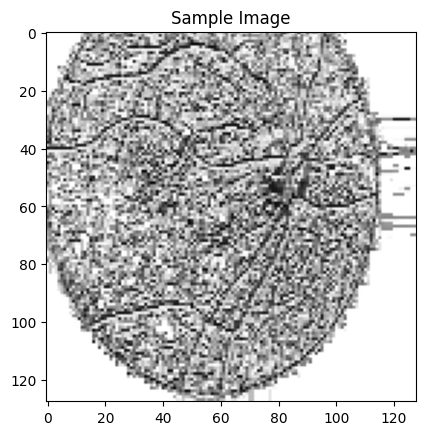

In [23]:
sample_image = xtrain[0].reshape(128, 128)
plt.imshow(sample_image, cmap='gray')
plt.title('Sample Image')
plt.show()

###Train the SVM model

In [24]:
model = None
svm_model = '/content/drive/MyDrive/Colab Notebooks/SVM Models/gray128_svm_default_model.pkl'

if not os.path.exists(svm_model):
  # Default parameters: C=1.0, kernel='rbf', gamma='scale', class_weight=None
  model = SVC()
  model.fit(xtrain, ytrain)

  # Save the svm model as pickle file
  with open(svm_model, 'wb') as file:
    pickle.dump(model, file)
else:
  # load model from pickle file
  with open(svm_model, 'rb') as file:
    model = pickle.load(file)

###Performance Measures

In [29]:
# Make predictions on the training set
y_train_pred = model.predict(xtrain)

In [26]:
# Make predictions on the test set
y_test_pred = model.predict(xtest)

In [33]:
# Calculate performance measures
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)
precision = precision_score(ytest, y_test_pred, average='macro')
recall = recall_score(ytest, y_test_pred, average='macro')
f1 = f1_score(ytest, y_test_pred, average='macro')

In [34]:
# Print the performance measures
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.8718050721034312
Testing Accuracy: 0.5331786542923433
Precision: 0.5625542199862148
Recall: 0.5331786542923433
F1-Score: 0.48085044760188345


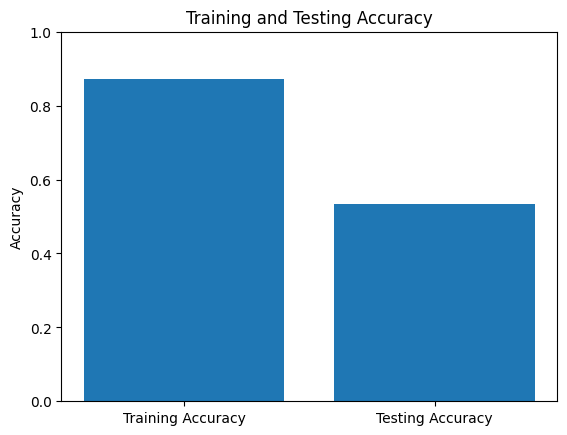

In [35]:
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy)
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1 for accuracy values
plt.show()